### 추세변동

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dates = pd.date_range('2020-01-01', periods=48, freq='M')

timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0,3.14*8,48))
np.random.seed(2004)
irregular_factor = 2*np.random.rand(len(dates))

df = pd.DataFrame({'timeseries':trend_factor +cycle_factor+seasonal_factor+irregular_factor,'trend':trend_factor,'cycle':cycle_factor,'seasonal':seasonal_factor,'irregular':irregular_factor},index=dates)
df.head()


,timeseries,trend,cycle,seasonal,irregular
2020-01-31,1.175497,0.0,0.000000,0.000000,1.175497
2020-02-29,7.606759,1.1,1.332198,3.565684,1.608878
2020-03-31,11.918142,2.2,2.640647,6.136825,0.940671
2020-04-30,15.169691,3.3,3.902021,6.996279,0.971392
2020-05-31,16.915638,4.4,5.093834,5.904327,1.517477


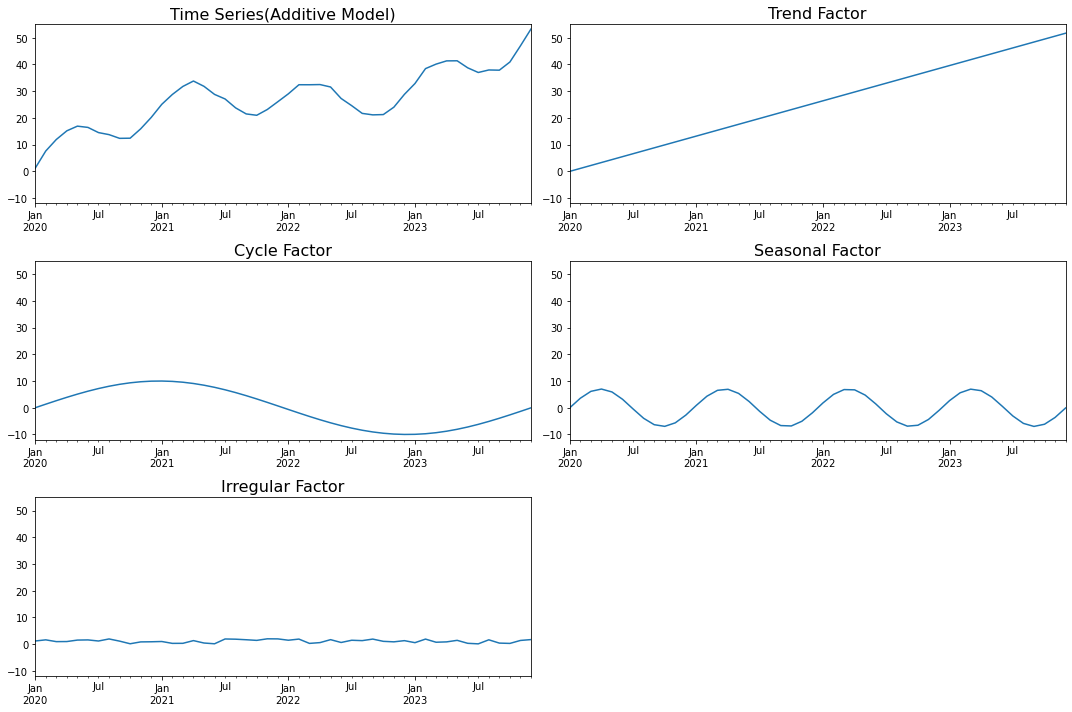

In [29]:
fig=plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
df.timeseries.plot()
plt.title('Time Series(Additive Model)',fontsize = 16)
plt.ylim(-12,55)

plt.subplot(3,2,2)
df.trend.plot()
plt.title('Trend Factor',fontsize=16)
plt.ylim(-12,55)

plt.subplot(3,2,3)
df.cycle.plot()
plt.title('Cycle Factor',fontsize=16)
plt.ylim(-12,55)

plt.subplot(3,2,4)
df.seasonal.plot()
plt.title('Seasonal Factor',fontsize=16)
plt.ylim(-12,55)

plt.subplot(3,2,5)
df.irregular.plot()
plt.title('Irregular Factor',fontsize=16)
plt.ylim(-12,55)

fig.tight_layout()
plt.show()

### 지수평활법
- DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [40]:
pd.date_range(start='2020-08',periods=8, freq='W')
df = pd.DataFrame({'week':pd.date_range(start='2020-08',periods=8, freq='W'),'sales':[39,44,40,45,38,43,39,np.nan],'3MA':[0]*8})

df['3MA'] = df[['sales']].rolling(3).mean().shift(1)
df['2MA'] = df[['sales']].rolling(2).mean().shift(1)
df

,week,sales,3MA,2MA
0,2020-08-02,39.0,NaN,NaN
1,2020-08-09,44.0,NaN,NaN
2,2020-08-16,40.0,NaN,41.5
3,2020-08-23,45.0,41.0,42.0
4,2020-08-30,38.0,43.0,42.5
5,2020-09-06,43.0,41.0,41.5
6,2020-09-13,39.0,42.0,40.5
7,2020-09-20,NaN,40.0,41.0


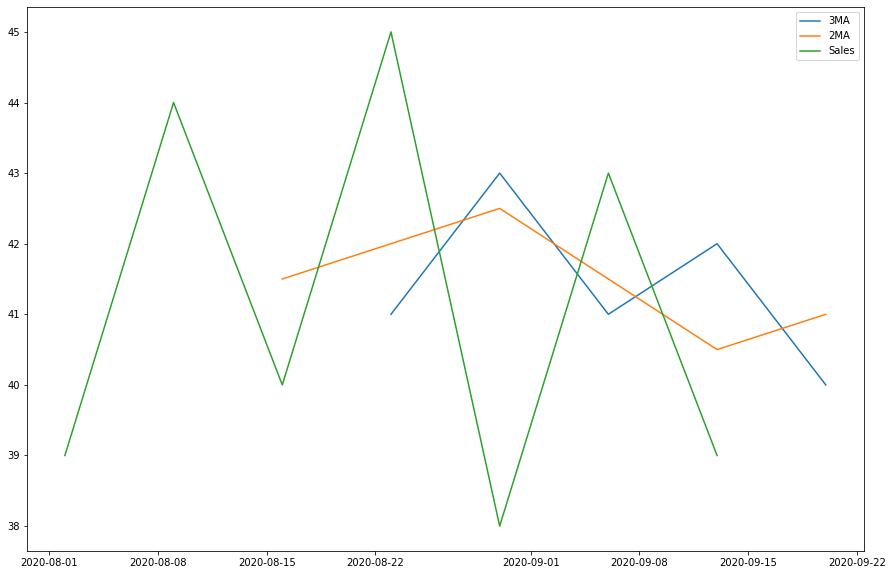

In [43]:
plt.figure(figsize=[15,10])
plt.plot(df['week'] , df['3MA'], label='3MA')
plt.plot(df['week'], df['2MA'], label='2MA')
plt.plot(df['week'],df['sales'],label='Sales')
plt.legend()

### FinanceDataReader
* https://financedata.github.io/posts/finance-data-reader-users-guide.html

#### 평활화

In [44]:
import FinanceDataReader as fdr
df_apple = fdr.DataReader('AAPL', start='2010')
df_apple.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-04-01,174.31,174.03,174.88,171.94,78750000.0,-0.0017
2022-04-04,178.44,174.57,178.49,174.44,76210000.0,0.0237
2022-04-05,175.06,177.50,178.30,174.41,70900000.0,-0.0189
2022-04-06,171.83,172.36,173.63,170.13,88670000.0,-0.0185
2022-04-07,172.14,171.16,173.36,169.85,74950000.0,0.0018
2022-04-08,170.09,171.78,171.78,169.20,76580000.0,-0.0119
2022-04-11,165.75,168.71,169.03,165.50,71550000.0,-0.0255
2022-04-12,167.66,168.02,169.87,166.64,78990000.0,0.0115
2022-04-13,170.40,167.39,171.04,166.77,70190000.0,0.0163


In [63]:
df_apple[['Close']]

,Close
Date,
2010-01-04,7.64
2010-01-05,7.66
2010-01-06,7.53
2010-01-07,7.52
2010-01-08,7.57
...,...
2022-04-11,165.75
2022-04-12,167.66
2022-04-13,170.40


Text(0.5, 1.0, 'Close Price for Apple')

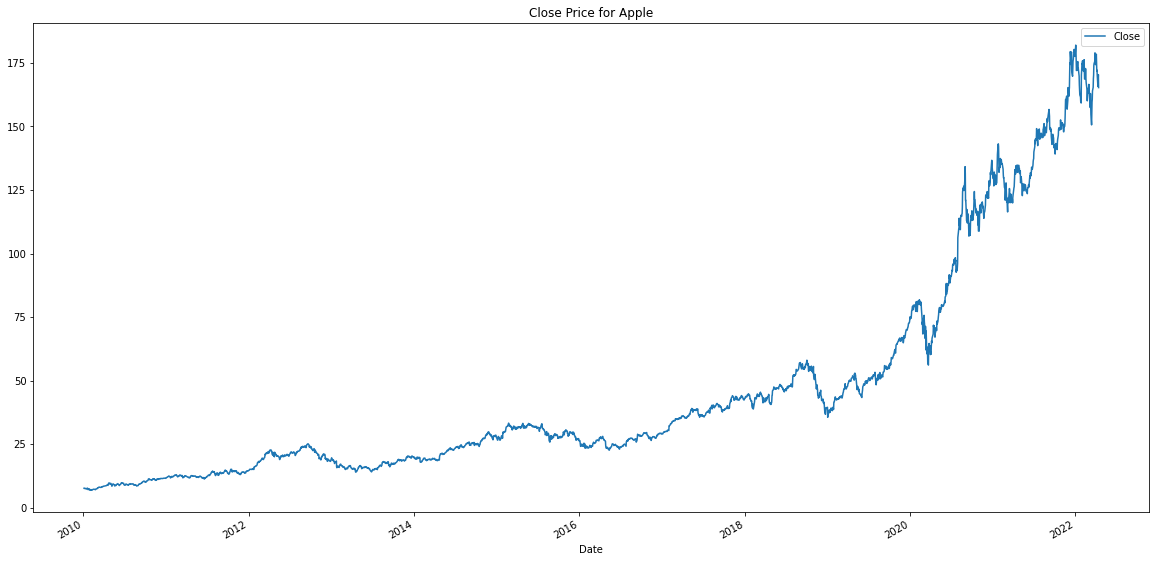

In [45]:
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

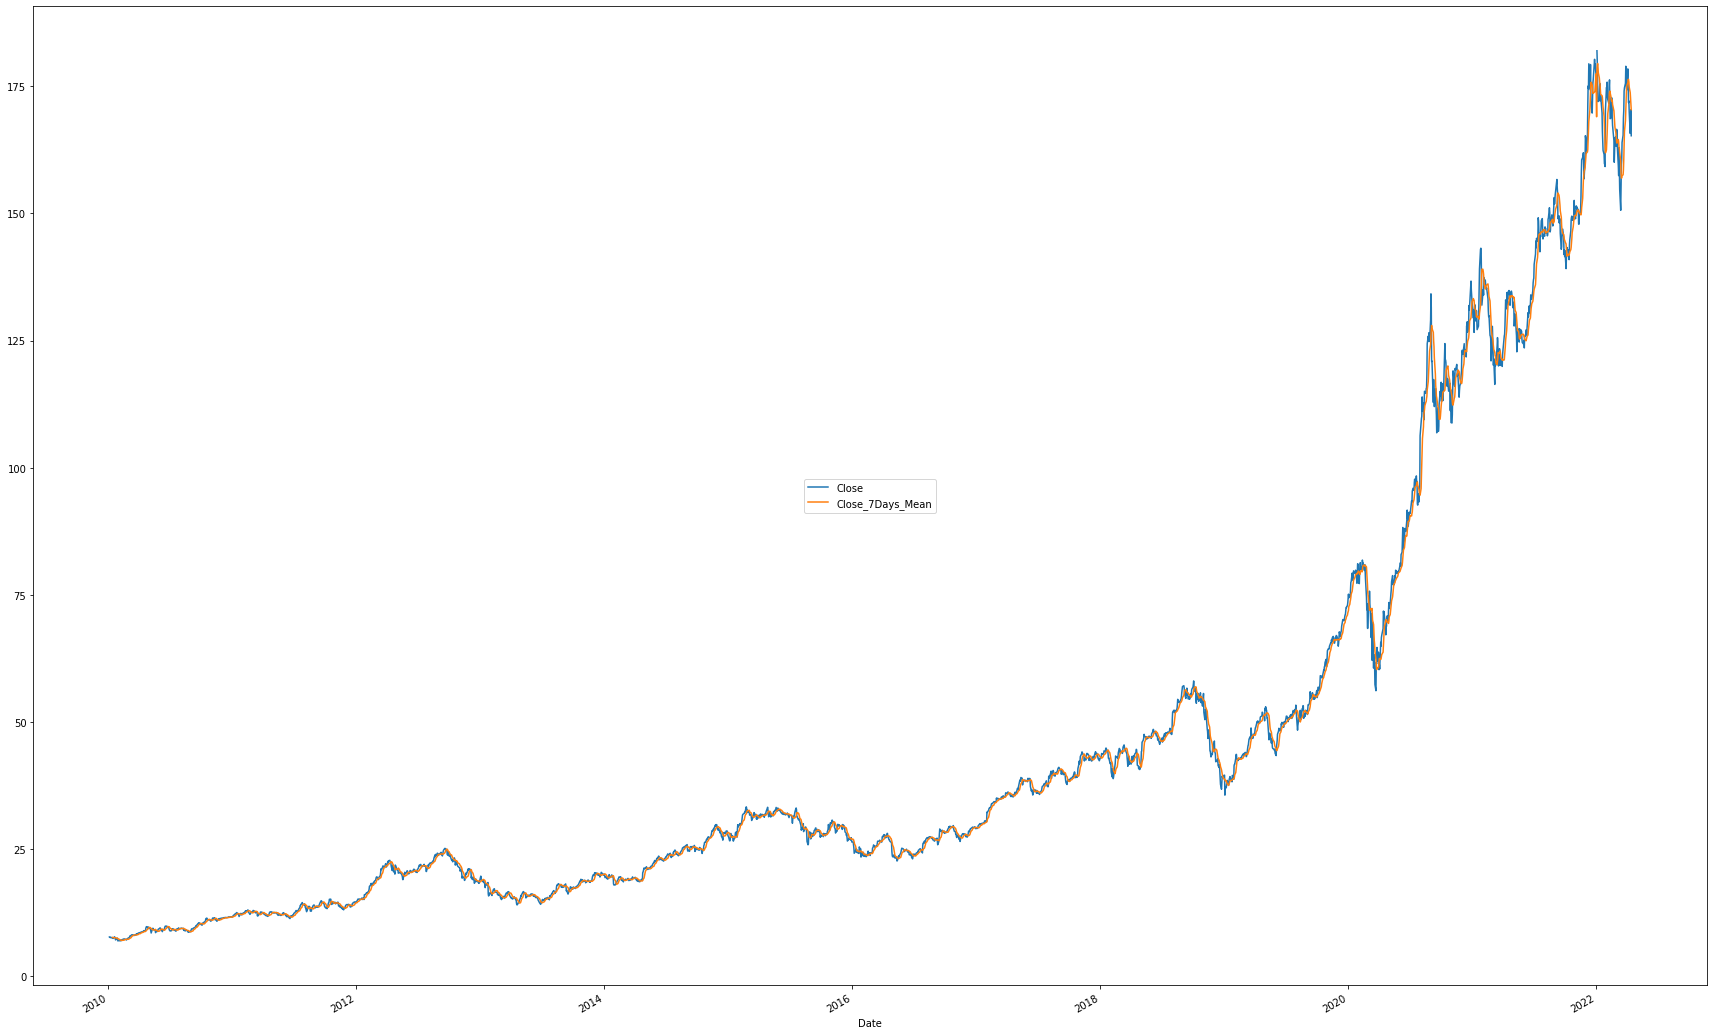

In [47]:
last_day = datetime(2022,1,2)
df_apple.loc[last_day,'Close'] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close','Close_7Days_Mean']].plot(figsize=(30,20))
plt.legend(loc='center')

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

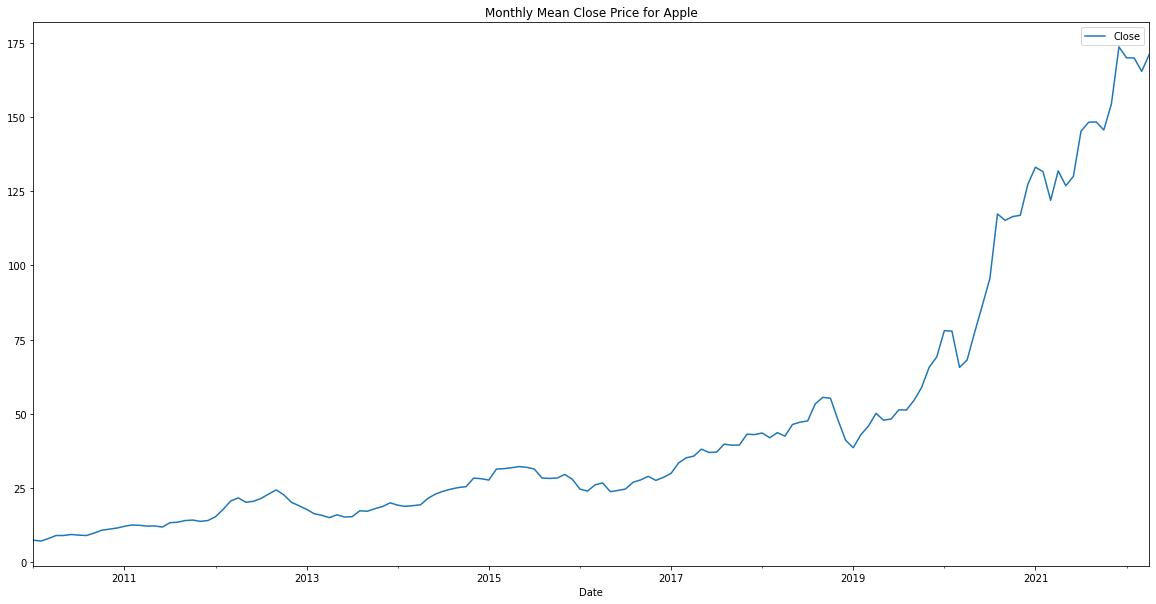

In [48]:
df_apple_monthly = df_apple.resample(rule='M').mean()

df_apple_monthly = df_apple_monthly.iloc[:,:-1]
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

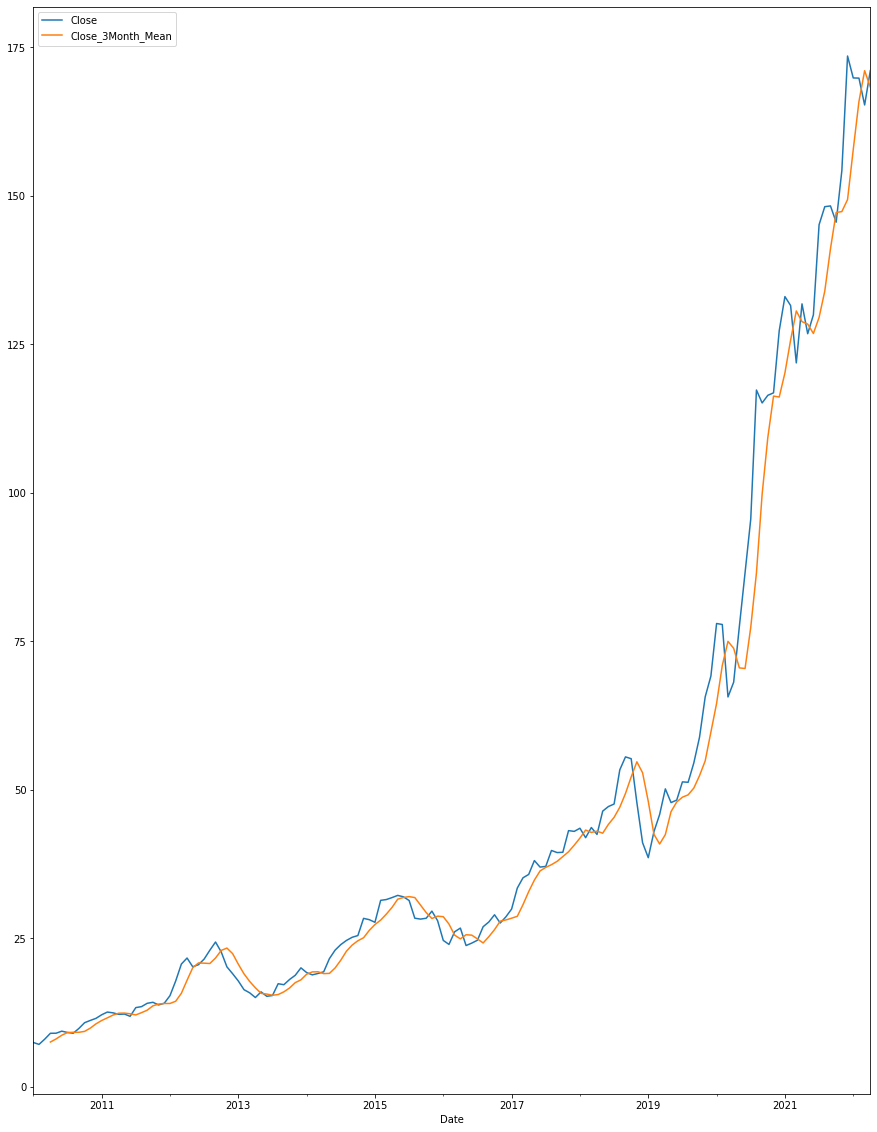

In [52]:
df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean().shift(1)
df_apple_monthly[['Close','Close_3Month_Mean']].plot(figsize=(15q,20))
plt.legend(loc=2)

### 지수평활법(EMA)
- DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')

<AxesSubplot:xlabel='index'>

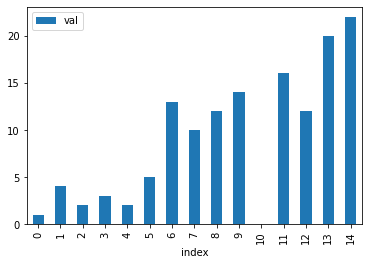

In [53]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
#df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')

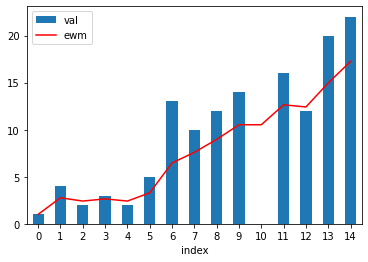

In [54]:
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val 열에 ewm 메서드 적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val')
ax2 = df2.plot(kind='line',x='index',y='ewm',color='red',ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show()

In [59]:
# myEWMA는 지수이동평균값을 df.ewm(span=3).mean()과 같이 계산해주도록 정의한 메소드
df = pd.DataFrame({'week':pd.date_range(start='2020-08',periods=8,freq="W"),
'sales':[39,44,40,45,38,43,39,np.nan],
'3EMA':[0]*8})

#지수 이동 평균 계산할 함수 , data 지수 이동 평균 계산 데이터 , span 지수 이동 평균의 거리 (강의 자료에서 3주마다 지수 이동 평균이므로 3)

def myEWMA(data,span):
    ewma=[0]*len(data) #지수 이동평균을 계산해서 저장할 리스트
    molecule = 0 #지수 이동 평균의 분자
    denominator = 0 #지수 이동 평균의 분모
    alpha = 2.0 / (1.0 + span)
    for i in range(len(data)):
        molecule = (data[i] + (1.0-alpha)*molecule) # 분자 계산 data+(1-alpha)앞의 데이터
        denominator+=(1-alpha)**i # 분모계산 (1-alpha)의 i승
        print(f"index : {i}")
        print(f"molecule : {molecule}")
        print(f"denominator : {denominator}")
        ewma[i] = molecule/denominator
        print(f"ewma : {ewma[i]}")
        print("="*100)
    return ewma

In [57]:
df['sales'].ewm(span=3).mean()

0    39.000000
1    42.333333
2    41.000000
3    43.133333
4    40.483871
5    41.761905
6    40.370079
7    40.370079
Name: sales, dtype: float64

In [60]:
myEWMA(df['sales'].iloc[0:2],3)

index : 0
molecule : 39.0
denominator : 1.0
ewma : 39.0
index : 1
molecule : 63.5
denominator : 1.5
ewma : 42.333333333333336


[39.0, 42.333333333333336]